# Boom Bikes Case Study

__Problem Statement__

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
Company want to understand the factors affecting the demand for these shared bikes in the American market. 

__Company's Intrests and Key Objectives__

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, 
The service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

__Business Goals__
- To understand how exactly the demands vary with different features.
- Build A Model to modify the business strategy to meet the demand levels and meet the customer's expectations.


#### Assignment 2 - MLR
#### ML C39 EPGP & MSML Batch Mar22 

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from IPython.display import display
from statsmodels.tools.eval_measures import rmse

import warnings

#set options
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None,'display.max_rows',500, 'display.max_colwidth', 1500, 'display.float_format',  '{:,.2f}'.format)



### Exploratory Data Analysis

In [2]:
bikes_df = pd.read_csv('./data/day.csv')
print("Bikes Data Shape :", bikes_df.shape)
bikes_df.head(5)


Bikes Data Shape : (730, 16)


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit  temp  atemp   hum  windspeed  casual  registered   cnt  
0           2 14.11  18.18 80.58      10.75     331         654   985  
1           2 14.90  17.69 69.61      16.65     131         670   801  
2           1  8.05   9.47 43.73      16.64     120        1229  1349  
3           1  8.20  10.61 59.04      10.74     108        1454  1562  
4           1  9.31  11.46 43.70      12.52      82        1518  1600

##### Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
# Print information about variables and check their data types.
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikes_df.describe()

instant  season     yr   mnth  holiday  weekday  workingday  \
count   730.00  730.00 730.00 730.00   730.00   730.00      730.00   
mean    365.50    2.50   0.50   6.53     0.03     3.00        0.68   
std     210.88    1.11   0.50   3.45     0.17     2.01        0.47   
min       1.00    1.00   0.00   1.00     0.00     0.00        0.00   
25%     183.25    2.00   0.00   4.00     0.00     1.00        0.00   
50%     365.50    3.00   0.50   7.00     0.00     3.00        1.00   
75%     547.75    3.00   1.00  10.00     0.00     5.00        1.00   
max     730.00    4.00   1.00  12.00     1.00     6.00        1.00   

       weathersit   temp  atemp    hum  windspeed   casual  registered  \
count      730.00 730.00 730.00 730.00     730.00   730.00      730.00   
mean         1.39  20.32  23.73  62.77      12.76   849.25    3,658.76   
std          0.54   7.51   8.15  14.24       5.20   686.48    1,559.76   
min          1.00   2.42   3.95   0.00       1.50     2.00       20.00   
25%          1.00  13.81  16.89  52.00       9.04   316.25    2,502.25   
50%          1.00  20.47  24.37  62.62      12.13   717.00    3,664.50   
75%          2.00  26.88  30.45  72.99      15.63 1,096.50    4,783.25   
max          3.00  35.33  42.04  97.25      34.00 3,410.00    6,946.00   

           cnt  
count   730.00  
mean  4,508.01  
std   1,936.01  
min      22.00  
25%   3,169.75  
50%   4,548.50  
75%   5,966.00  
max   8,714.00

### Visualising Variables


In [5]:
sns.set(style='ticks',palette=sns.color_palette('tab10'))

<Figure size 1440x1440 with 0 Axes>

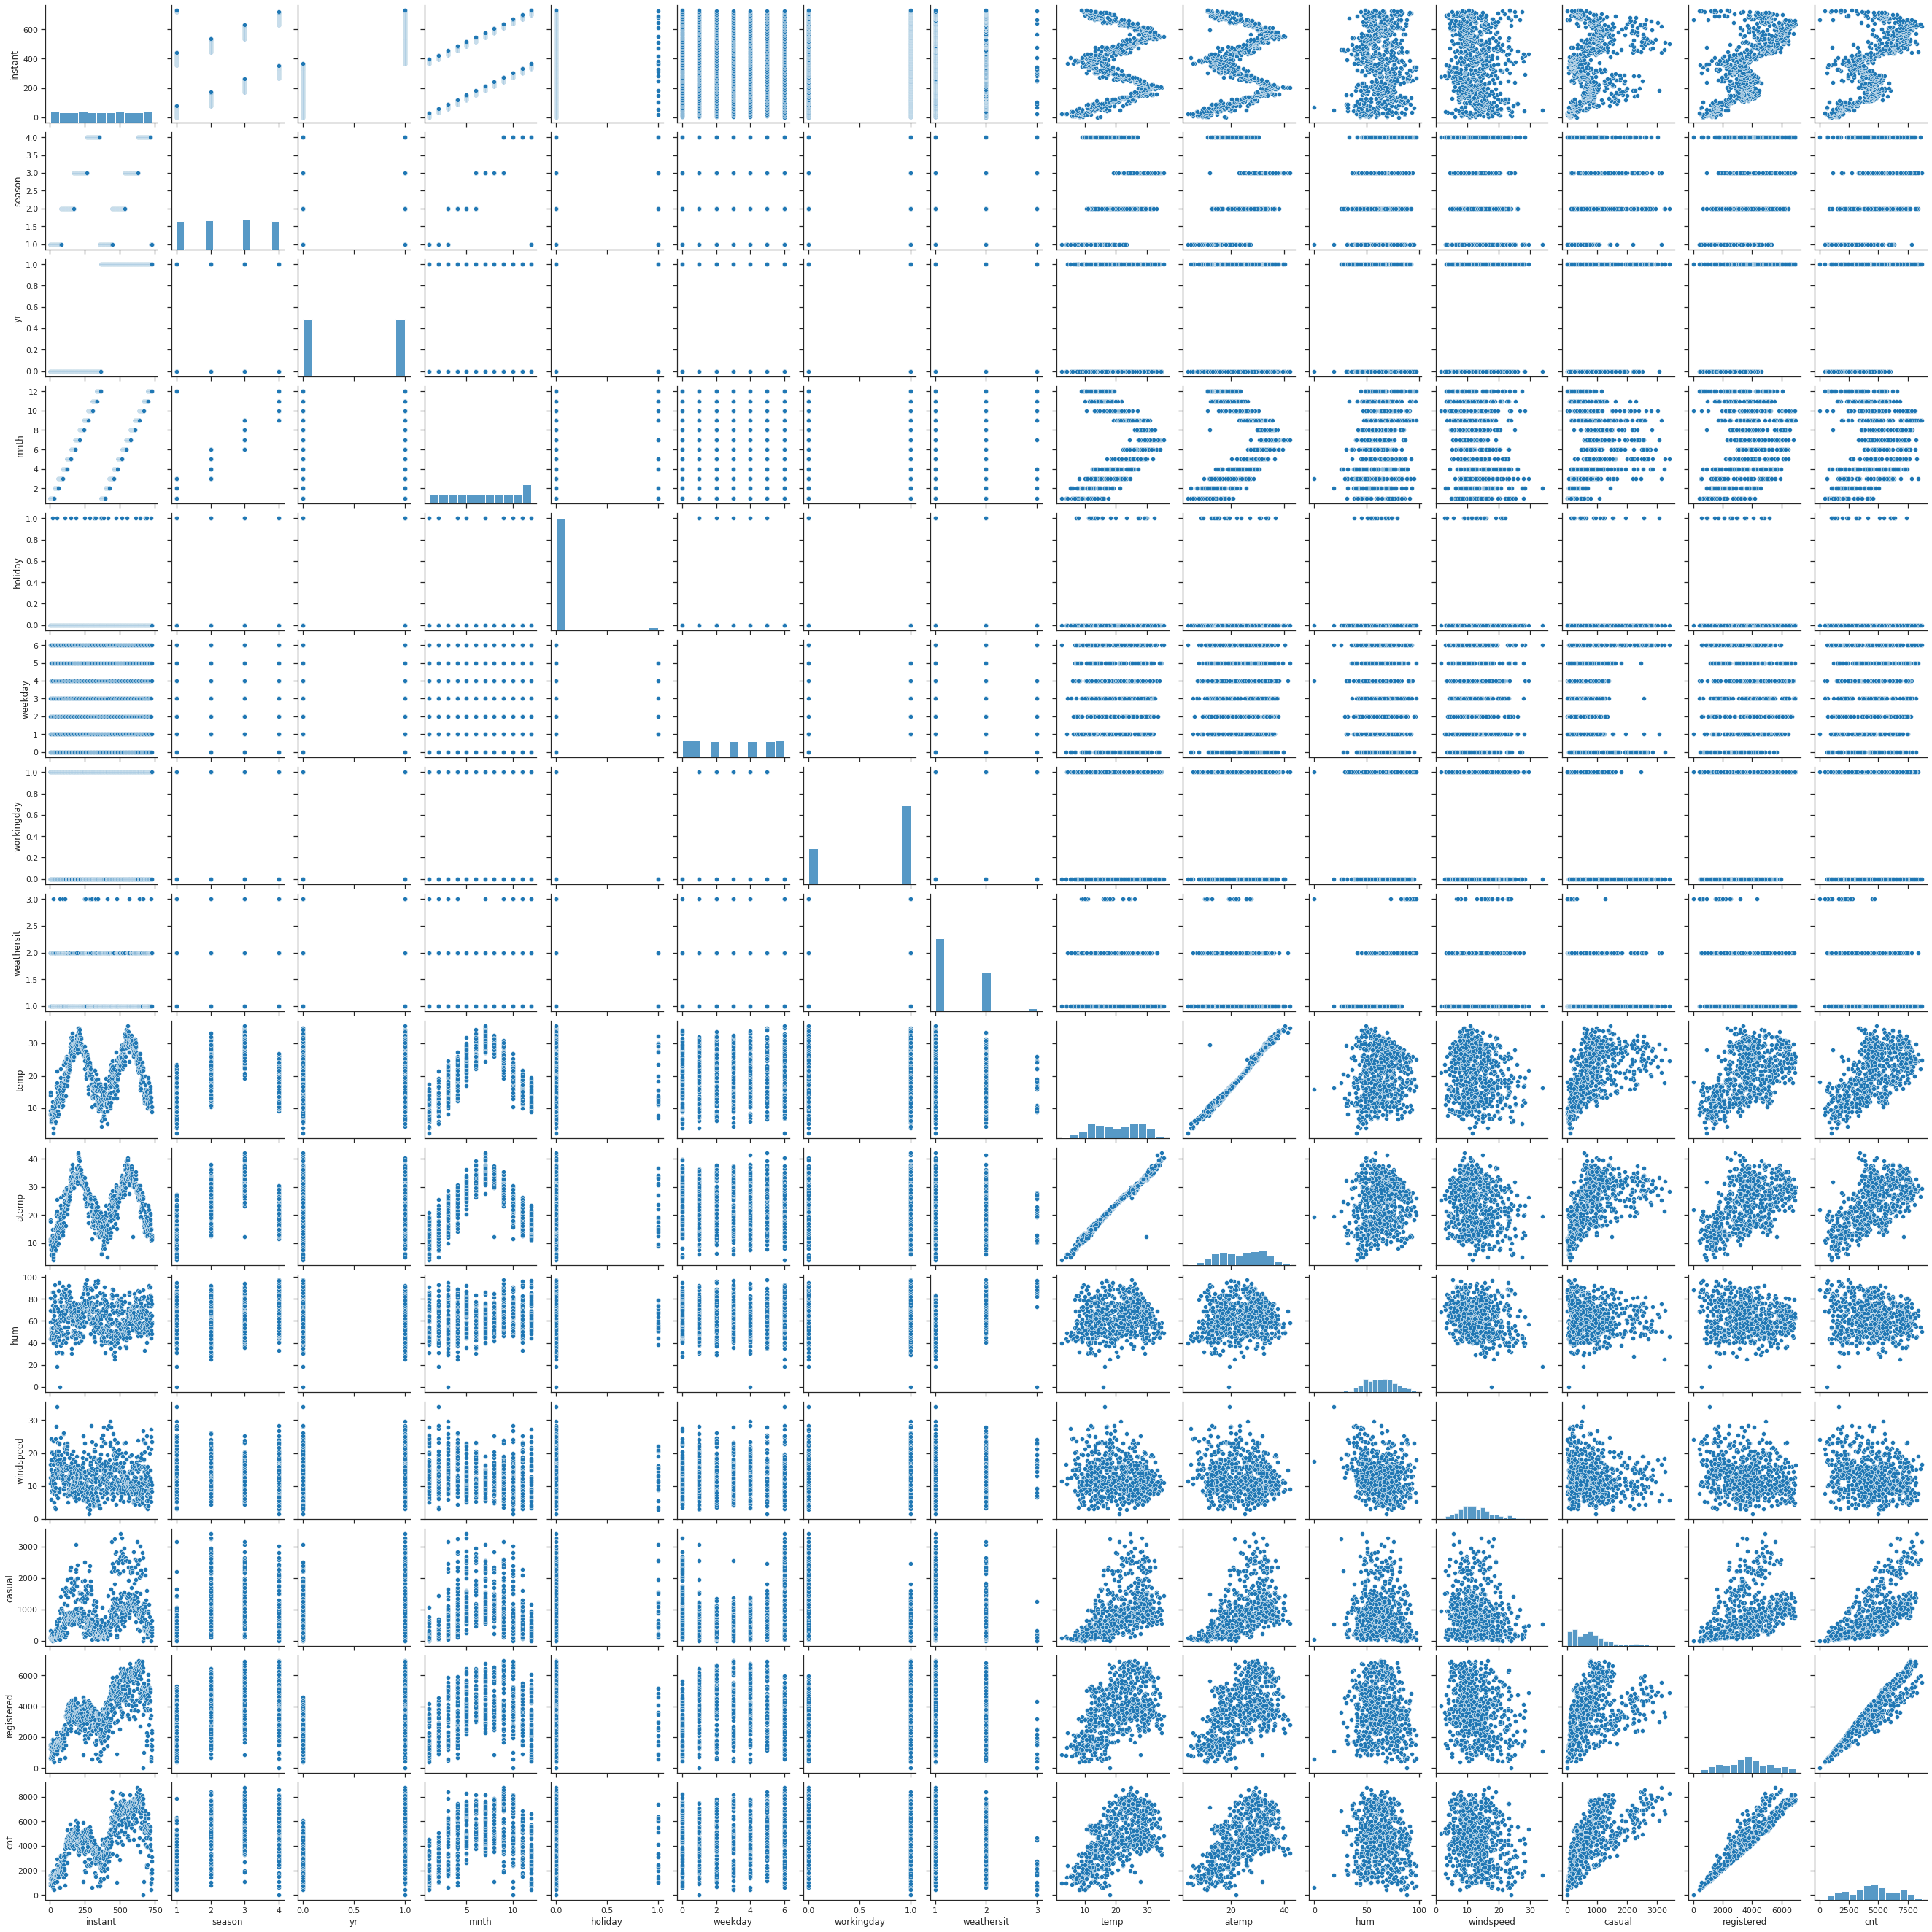

In [6]:
## pairplot of all the numeric variables
plt.figure(figsize=(20,20))

sns.pairplot(bikes_df)
plt.show()


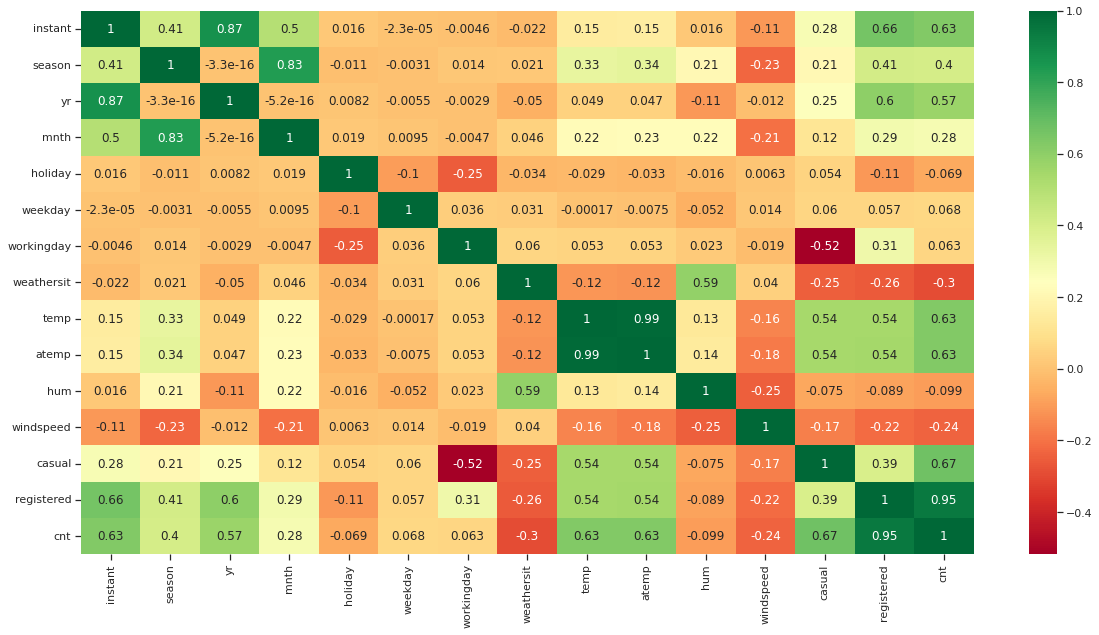

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(bikes_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### Observations
- *instant* is just an record index, so can be dropped.  
- *dteday*  can be dropped, as other date variables like month, weekday, year etc. are present.  
- *cnt* is our target variable which is total of *casual* and *registered*, hence those two can be dropped.   

In [8]:
#Droping columns which are not required.
bikes_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1,inplace=True)
print("Bikes Data Shape :", bikes_df.shape)

Bikes Data Shape : (730, 12)


In [9]:
# Find count columns with null values
print("Percentage Null Values per Column\n", round((100*bikes_df.isnull().sum().sort_values(ascending=False))/len(bikes_df.index)))

Percentage Null Values per Column
 season       0.00
yr           0.00
mnth         0.00
holiday      0.00
weekday      0.00
workingday   0.00
weathersit   0.00
temp         0.00
atemp        0.00
hum          0.00
windspeed    0.00
cnt          0.00
dtype: float64


#### Observations
- No Missing Values were identified.

In [10]:
bikes_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

##### Observations
- No column found with single unique values. 
- Columns with 2, 3 or 4 unique values appers to be categorical as per characterstics explained. 

##### Extracting Categorical Variables

In [11]:
# maping of variables 
bikes_df[["season"]]=bikes_df[["season"]].apply(lambda x:x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"}))
bikes_df[['mnth']]=bikes_df[['mnth']].apply(lambda x:x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5: "May",
                                         6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11: "Nov",12:"Dec"}))

bikes_df[['weathersit']] = bikes_df[['weathersit']].apply(lambda x:x.map({1:'Clear_FewClouds',2:"Mist_Cloudy",3:"Light_Snow",4:"Heavy_Rain"}))
bikes_df[['weekday']] = bikes_df[['weekday']].apply(lambda x:x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}))
bikes_df[['holiday']] = bikes_df[['holiday']].apply(lambda x:x.map({0:"No",1:"Yes"}))
bikes_df[['workingday']] = bikes_df[['workingday']].apply(lambda x:x.map({0:"No",1:"Yes"}))
bikes_df[['yr']] = bikes_df[['yr']].apply(lambda x:x.map({0:"2018",1:"2019"}))


In [12]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [13]:
bikes_df.head(5)

season    yr mnth holiday weekday workingday       weathersit  temp  atemp  \
0  Spring  2018  Jan      No     Sat         No      Mist_Cloudy 14.11  18.18   
1  Spring  2018  Jan      No     Sun         No      Mist_Cloudy 14.90  17.69   
2  Spring  2018  Jan      No     Mon        Yes  Clear_FewClouds  8.05   9.47   
3  Spring  2018  Jan      No     Tue        Yes  Clear_FewClouds  8.20  10.61   
4  Spring  2018  Jan      No     Wed        Yes  Clear_FewClouds  9.31  11.46   

    hum  windspeed   cnt  
0 80.58      10.75   985  
1 69.61      16.65   801  
2 43.73      16.64  1349  
3 59.04      10.74  1562  
4 43.70      12.52  1600

#### Visualising Numeric Variables

In [14]:
sns.set(style='darkgrid',palette=sns.color_palette('tab10'))

<Figure size 720x360 with 0 Axes>

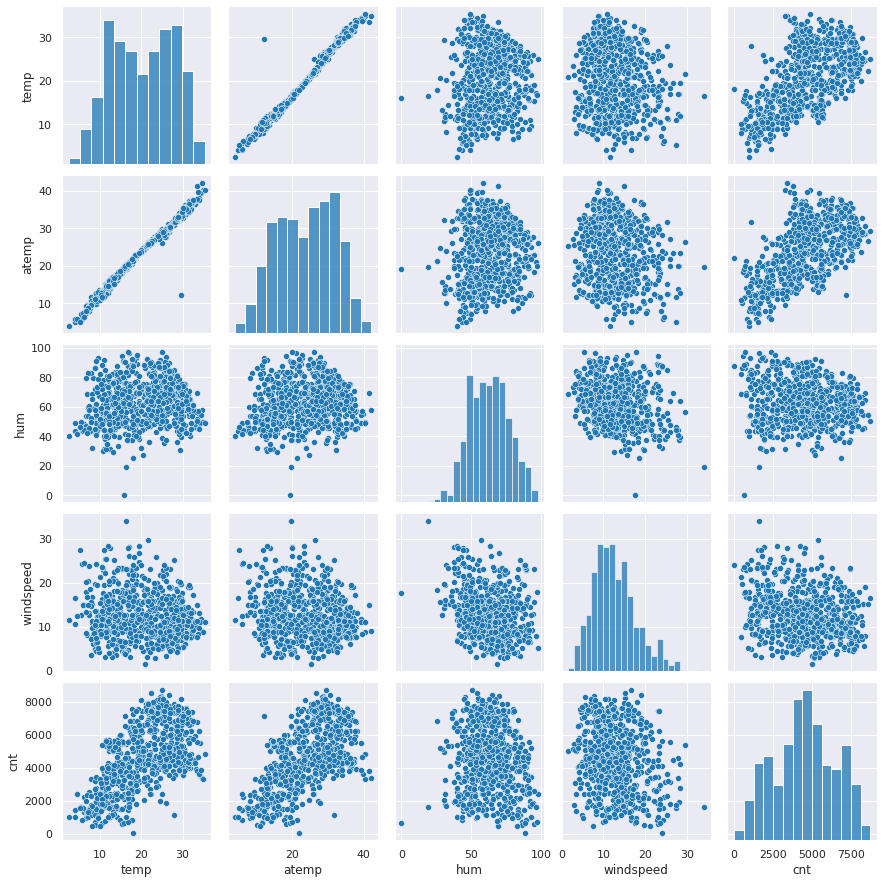

In [15]:
## pairplot of all the numeric variables
plt.figure(figsize=(10,5))

sns.pairplot(bikes_df)
plt.show()


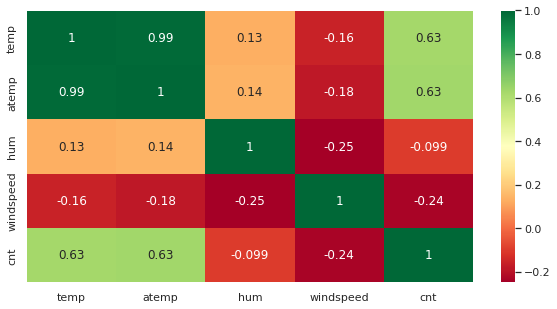

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(bikes_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [17]:
sns.set(style='white',palette=sns.color_palette('tab10'))

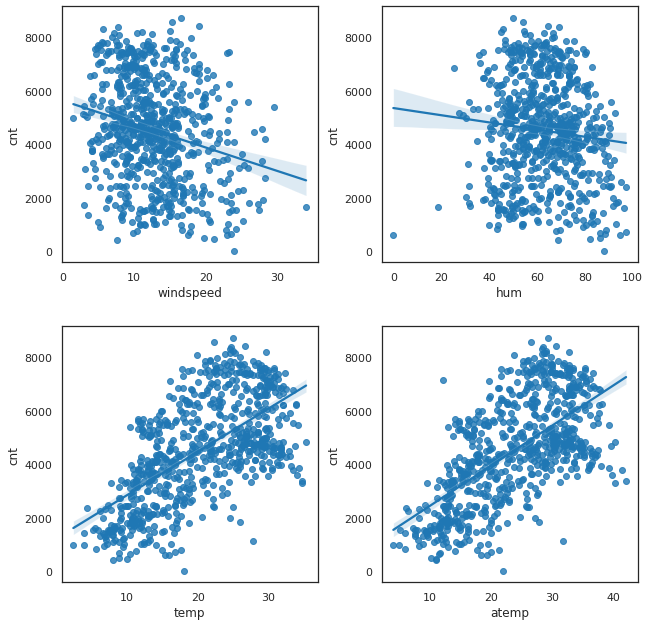

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.regplot(x='windspeed' , y='cnt' , data=bikes_df)

plt.subplot(2,2,2)
sns.regplot(x='hum' , y='cnt' , data=bikes_df)

plt.subplot(2,2,3)
sns.regplot(x='temp' , y='cnt' , data=bikes_df)

plt.subplot(2,2,4)
sns.regplot(x='atemp' , y='cnt' , data=bikes_df)

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.25,hspace=0.25)
plt.show()

#### Observations
- Demand is goes high with rise in temperature 
- *temp* and *atemp* are highly corelated with each other. We can see further during model building 
- Demand is inversely affected by humidity, hence it slows down when humdity is high.
- Similarly Demand is negatively affected by windspeed, it rises when windspeed is less.  

#### Visualising Categorical Variables


In [19]:
def barplot(x, y, df):
    ax = sns.barplot(x=x,y=y,data=df, ci=None)
    plt.bar_label(ax.containers[0], padding=2)
    sns.despine()
    #plt.show()
    return ax

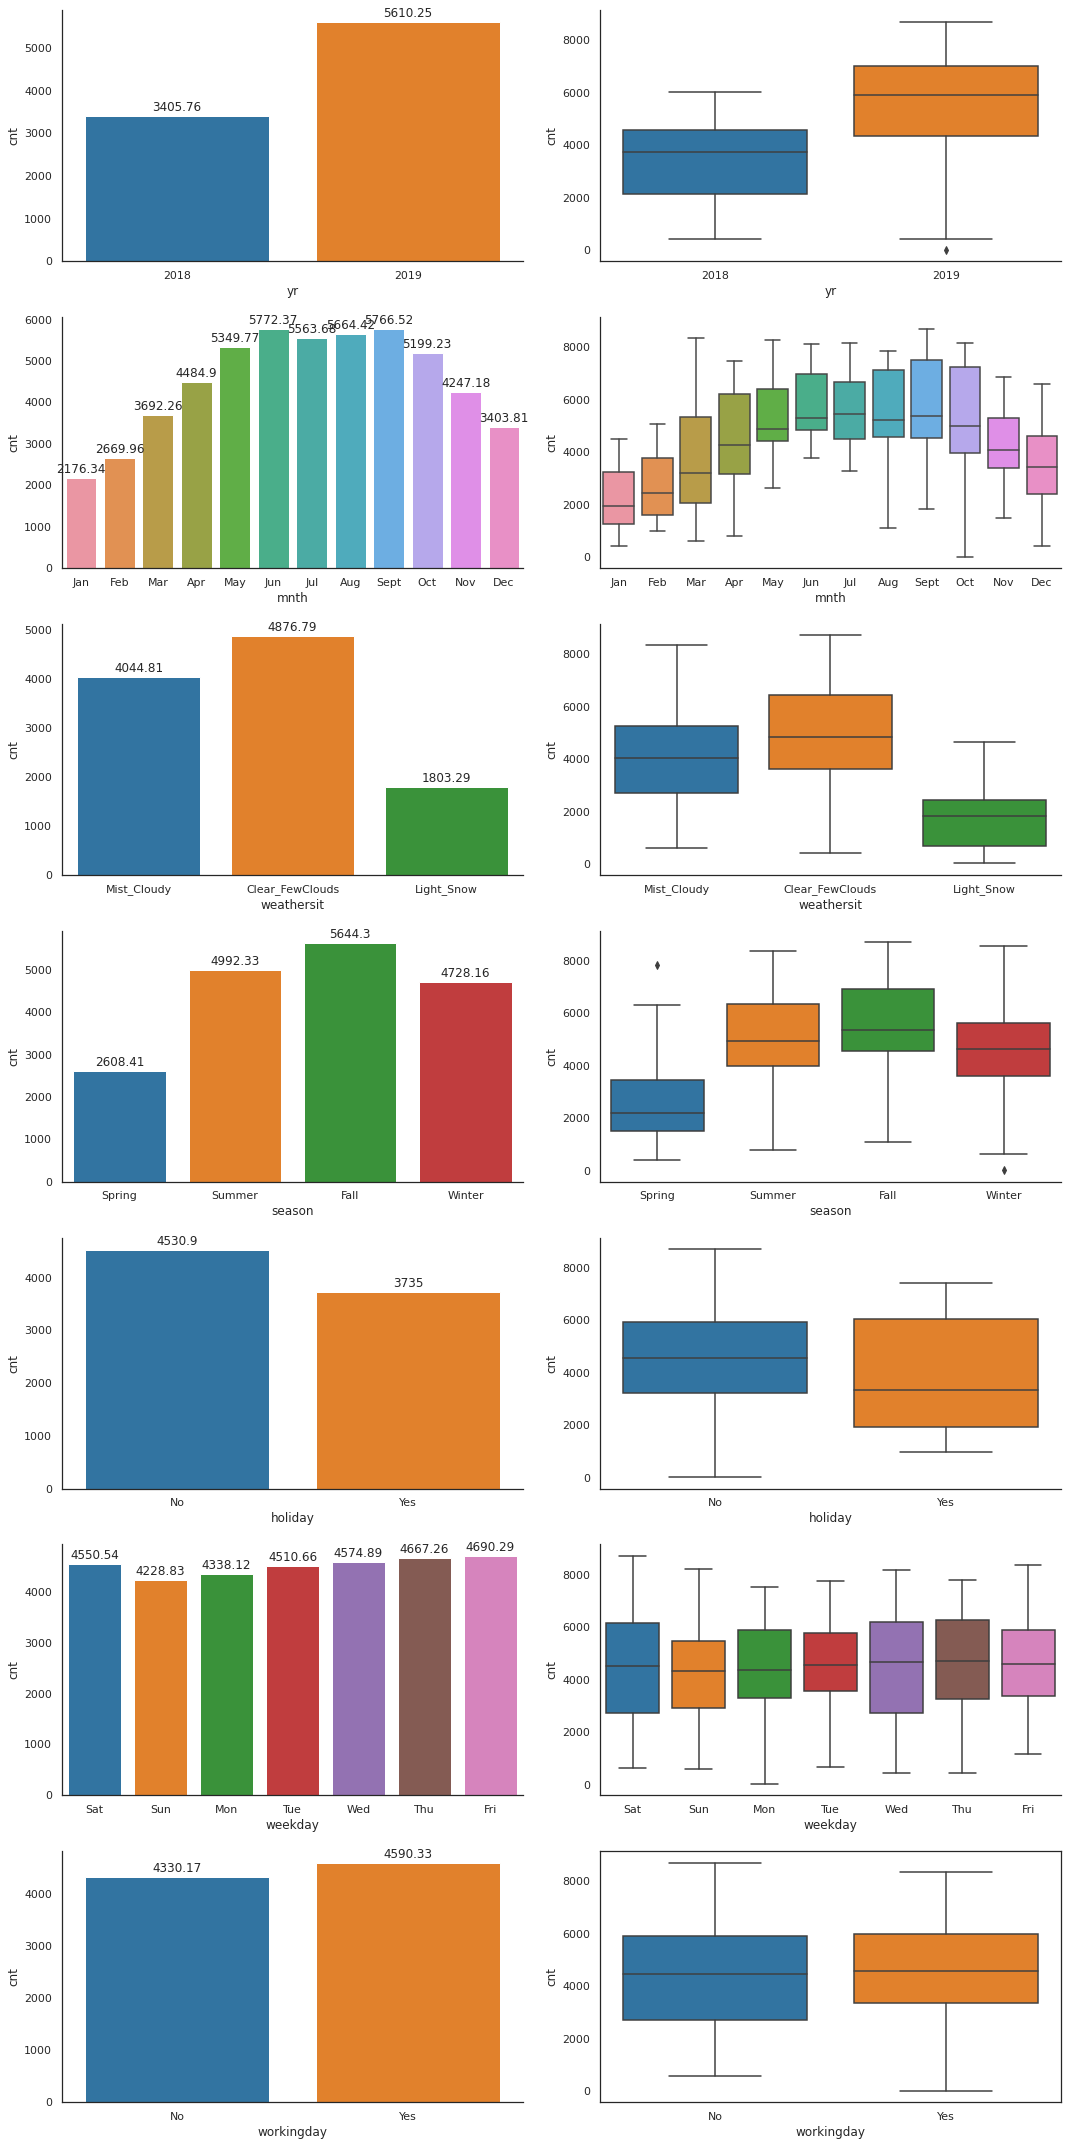

In [20]:
plt.figure(figsize=(15,30))

plt.subplot(7,2,1)
barplot(x='yr', y='cnt', df=bikes_df)
plt.subplot(7,2,2)
sns.boxplot(x='yr', y='cnt', data=bikes_df)

plt.subplot(7,2,3)
barplot(x='mnth', y='cnt', df=bikes_df)
plt.subplot(7,2,4)
sns.boxplot(x='mnth', y='cnt', data=bikes_df)

plt.subplot(7,2,5)
barplot(x='weathersit', y='cnt', df=bikes_df)
plt.subplot(7,2,6)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)

plt.subplot(7,2,7)
barplot(x='season', y='cnt', df=bikes_df)
plt.subplot(7,2,8)
sns.boxplot(x='season', y='cnt', data=bikes_df)

plt.subplot(7,2,9)
barplot(x='holiday', y='cnt', df=bikes_df)
plt.subplot(7,2,10)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)

plt.subplot(7,2,11)
barplot(x='weekday', y='cnt', df=bikes_df)
plt.subplot(7,2,12)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)

plt.subplot(7,2,13)
barplot(x='workingday', y='cnt', df=bikes_df)
plt.subplot(7,2,14)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)

plt.tight_layout()
plt.show()


#### Observations
- There was significant jump in Demand during 2019 compared to 2018
- Demand is high during June, Aug & Sept months 
- Demand is high during Fall and Summer seasons and less during Spring season
- More registrations are done during Working days and Non holidays 
- Demand is high when weather is Clear, less or partly cloudy


#### Numeric Variables Correlation among categorical variables 

In [21]:
sns.set(style='ticks',palette=sns.color_palette('tab10'))

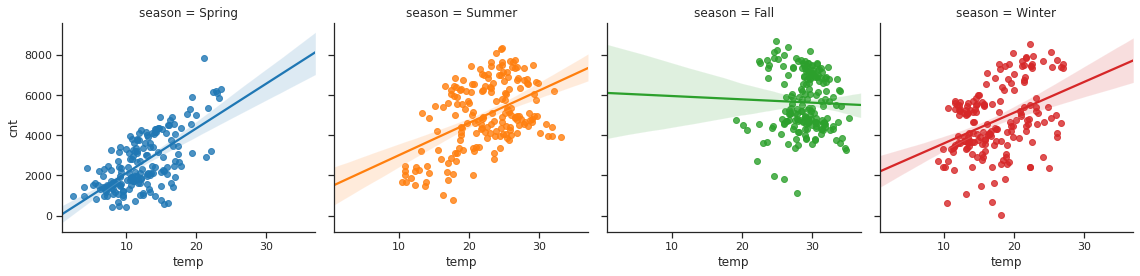

In [22]:
sns.lmplot(x='temp', y='cnt', data=bikes_df, hue='season', col='season', height=4, truncate=False)

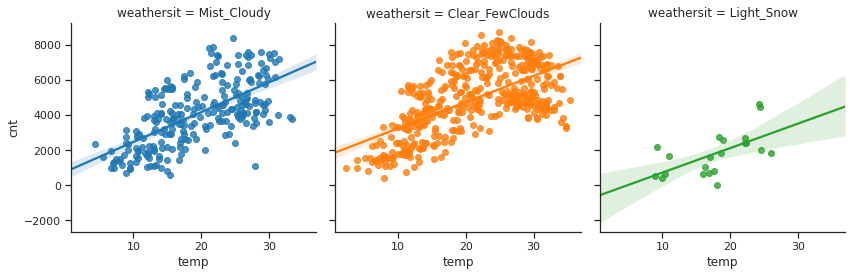

In [23]:
sns.lmplot(x='temp', y='cnt', data=bikes_df, col='weathersit', hue='weathersit', height=4, truncate=False)

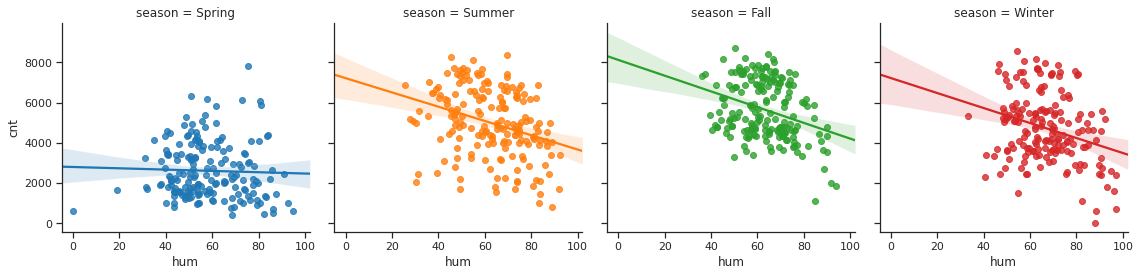

In [24]:
sns.lmplot(x='hum', y='cnt', data=bikes_df, col='season', hue='season', height=4, truncate=False)

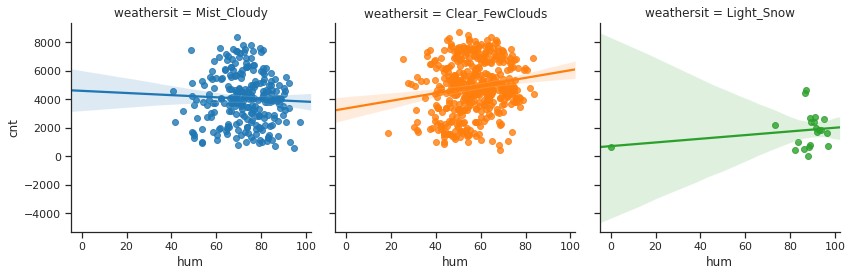

In [25]:
sns.lmplot(x='hum', y='cnt', data=bikes_df, col='weathersit', hue='weathersit', height=4, truncate=False)

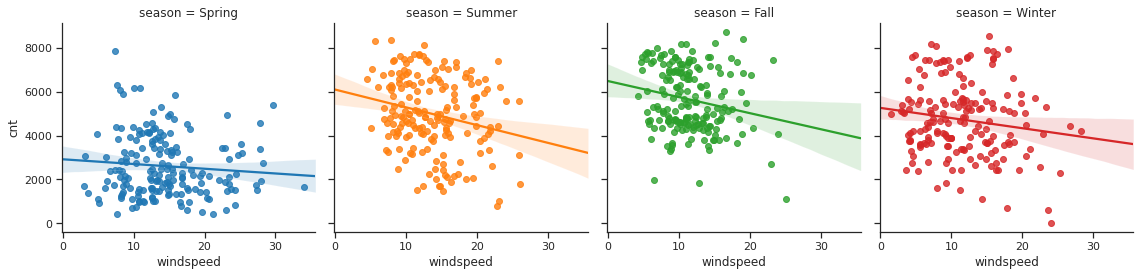

In [26]:
sns.lmplot(x='windspeed', y='cnt', data=bikes_df, col='season', hue='season', height=4, truncate=False)

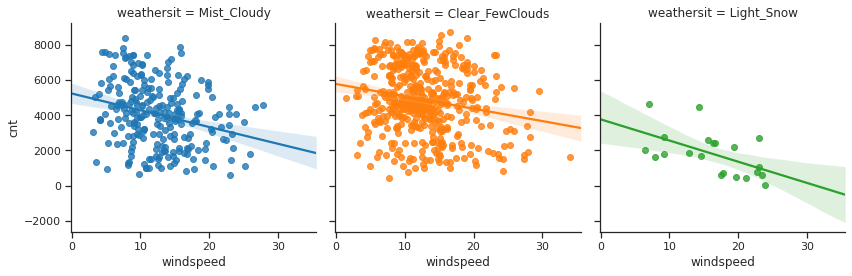

In [27]:
sns.lmplot(x='windspeed', y='cnt', data=bikes_df, col='weathersit', hue='weathersit', height=4, truncate=False)

#### Observations
- *temp* Temperature has postive affect on demand among seasons except during Fall when it tends to slow with rise in temperature
- *temp* and *weathersit* are quite linear. Demand rises with temperature in both clear and misty weather conditions, but its slightly less during light snow  
- *hum* Humidity has inverse affect on demand among seasons and weather conditions. Though it has lesser affect in demand in Clear Weather  
- *windspeed* Windspeed has inverse affect on demand among seasons and weather conditions. 

#### Preparing data for Linear Regression

In [28]:
## Dummy column creation

df_season = pd.get_dummies(bikes_df['season'], drop_first=True)
df_weather = pd.get_dummies(bikes_df['weathersit'], drop_first=True)
df_mnth = pd.get_dummies(bikes_df['mnth'], drop_first=True) 
df_weekday=pd.get_dummies(bikes_df['weekday'], drop_first=True)
df_year = pd.get_dummies(bikes_df['yr'], drop_first=True, prefix='Year')
df_holiday= pd.get_dummies(bikes_df['holiday'], drop_first=True, prefix='Holiday')
df_workingday = pd.get_dummies(bikes_df['workingday'], drop_first=True, prefix='Workingday')

In [29]:
bikes_df = pd.concat([bikes_df, df_season], axis=1)
bikes_df = pd.concat([bikes_df, df_weather], axis=1)
bikes_df = pd.concat([bikes_df, df_mnth], axis=1)
bikes_df = pd.concat([bikes_df, df_weekday], axis=1)
bikes_df = pd.concat([bikes_df, df_year], axis=1)
bikes_df = pd.concat([bikes_df, df_holiday], axis=1)
bikes_df = pd.concat([bikes_df, df_workingday], axis=1)

In [30]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    object 
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    object 
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    object 
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Spring          730 non-null    uint8  
 13  Summer          730 non-null    uint8  
 14  Winter          730 non-null    uint8  
 15  Light_Snow      730 non-null    uint8  
 16  Mist_Cloudy     730 non-null    uint8  
 17  Aug             730 non-null    uin

In [31]:
# Droping categorical columns post dummy column creation
bikes_df.drop(['season','yr', 'mnth', 'weathersit', 'workingday', 'holiday', 'weekday'], inplace=True, axis=1)

In [32]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            730 non-null    float64
 1   atemp           730 non-null    float64
 2   hum             730 non-null    float64
 3   windspeed       730 non-null    float64
 4   cnt             730 non-null    int64  
 5   Spring          730 non-null    uint8  
 6   Summer          730 non-null    uint8  
 7   Winter          730 non-null    uint8  
 8   Light_Snow      730 non-null    uint8  
 9   Mist_Cloudy     730 non-null    uint8  
 10  Aug             730 non-null    uint8  
 11  Dec             730 non-null    uint8  
 12  Feb             730 non-null    uint8  
 13  Jan             730 non-null    uint8  
 14  Jul             730 non-null    uint8  
 15  Jun             730 non-null    uint8  
 16  Mar             730 non-null    uint8  
 17  May             730 non-null    uin

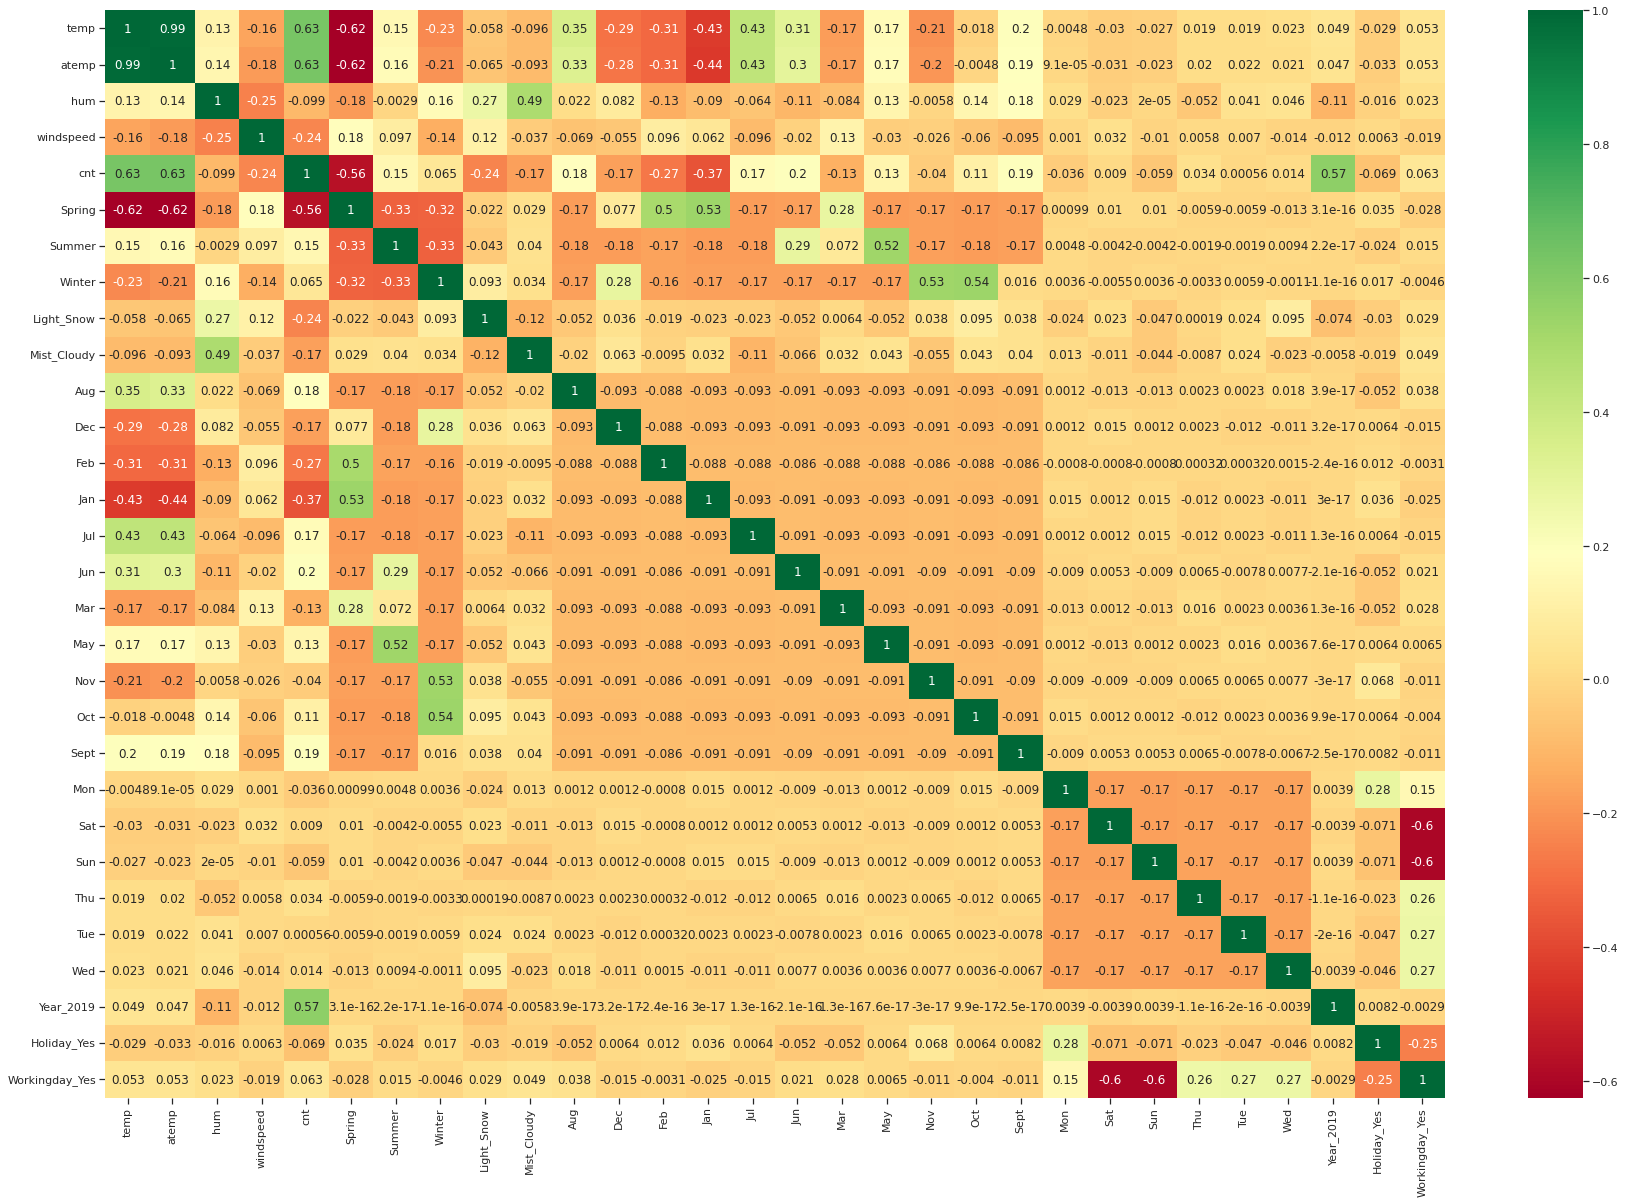

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(bikes_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [34]:
bikes_df.head(5)

temp  atemp   hum  windspeed   cnt  Spring  Summer  Winter  Light_Snow  \
0 14.11  18.18 80.58      10.75   985       1       0       0           0   
1 14.90  17.69 69.61      16.65   801       1       0       0           0   
2  8.05   9.47 43.73      16.64  1349       1       0       0           0   
3  8.20  10.61 59.04      10.74  1562       1       0       0           0   
4  9.31  11.46 43.70      12.52  1600       1       0       0           0   

   Mist_Cloudy  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sept  Mon  \
0            1    0    0    0    1    0    0    0    0    0    0     0    0   
1            1    0    0    0    1    0    0    0    0    0    0     0    0   
2            0    0    0    0    1    0    0    0    0    0    0     0    1   
3            0    0    0    0    1    0    0    0    0    0    0     0    0   
4            0    0    0    0    1    0    0    0    0    0    0     0    0   

   Sat  Sun  Thu  Tue  Wed  Year_2019  Holiday_Yes  Workingday_Yes  
0    1    0    0    0    0          0            0               0  
1    0    1    0    0    0          0            0               0  
2    0    0    0    0    0          0            0               1  
3    0    0    0    1    0          0            0               1  
4    0    0    0    0    1          0            0               1

### Linear Regression 
##### Splitting the data into Training & Test Data

In [35]:
np.random.seed(0)
train_df, test_df = train_test_split(bikes_df, test_size=0.3, random_state=100)

##### Rescaling Numerical Features - Training data


In [36]:
num_vars = ['temp','cnt','hum','windspeed', 'atemp']
#Using Normalized scaler to scale
scaler = MinMaxScaler()
#Fit and transform training set
train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

##### Dividing into X and Y training sets for the model building

In [37]:
y_train = train_df.pop('cnt')
X_train = train_df

In [38]:
print(X_train.shape)

(511, 29)


In [39]:
X_train.head()

temp  atemp  hum  windspeed  Spring  Summer  Winter  Light_Snow  \
653  0.51   0.50 0.58       0.30       0       0       1           0   
576  0.82   0.77 0.73       0.26       0       0       0           0   
426  0.44   0.44 0.64       0.26       1       0       0           0   
728  0.25   0.20 0.50       0.66       1       0       0           0   
482  0.40   0.39 0.50       0.19       0       1       0           0   

     Mist_Cloudy  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sept  Mon  \
653            0    0    0    0    0    0    0    0    0    0    1     0    0   
576            0    0    0    0    0    1    0    0    0    0    0     0    0   
426            1    0    0    0    0    0    0    1    0    0    0     0    0   
728            0    0    1    0    0    0    0    0    0    0    0     0    0   
482            1    0    0    0    0    0    0    0    0    0    0     0    0   

     Sat  Sun  Thu  Tue  Wed  Year_2019  Holiday_Yes  Workingday_Yes  
653    0    0    0    1    0          1            0               1  
576    0    0    0    1    0          1            0               1  
426    1    0    0    0    0          1            0               0  
728    0    1    0    0    0          1            0               0  
482    1    0    0    0    0          1            0               0

In [40]:
#describing the data
X_train.describe()


temp  atemp    hum  windspeed  Spring  Summer  Winter  Light_Snow  \
count 511.00 511.00 511.00     511.00  511.00  511.00  511.00      511.00   
mean    0.54   0.51   0.65       0.32    0.24    0.25    0.25        0.03   
std     0.23   0.21   0.15       0.17    0.43    0.43    0.43        0.17   
min     0.00   0.00   0.00       0.00    0.00    0.00    0.00        0.00   
25%     0.34   0.33   0.54       0.20    0.00    0.00    0.00        0.00   
50%     0.54   0.53   0.65       0.30    0.00    0.00    0.00        0.00   
75%     0.74   0.69   0.75       0.41    0.00    0.00    0.00        0.00   
max     1.00   1.00   1.00       1.00    1.00    1.00    1.00        1.00   

       Mist_Cloudy    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May  \
count       511.00 511.00 511.00 511.00 511.00 511.00 511.00 511.00 511.00   
mean          0.34   0.10   0.08   0.07   0.09   0.08   0.08   0.10   0.08   
std           0.48   0.29   0.28   0.25   0.28   0.27   0.27   0.30   0.28   
min           0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
25%           0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
50%           0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
75%           1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
max           1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

         Nov    Oct   Sept    Mon    Sat    Sun    Thu    Tue    Wed  \
count 511.00 511.00 511.00 511.00 511.00 511.00 511.00 511.00 511.00   
mean    0.09   0.09   0.08   0.15   0.15   0.14   0.13   0.13   0.16   
std     0.28   0.28   0.27   0.36   0.36   0.35   0.34   0.34   0.37   
min     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
25%     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
50%     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
75%     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
max     1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

       Year_2019  Holiday_Yes  Workingday_Yes  
count     511.00       511.00          511.00  
mean        0.51         0.03            0.68  
std         0.50         0.16            0.47  
min         0.00         0.00            0.00  
25%         0.00         0.00            0.00  
50%         1.00         0.00            1.00  
75%         1.00         0.00            1.00  
max         1.00         1.00            1.00

In [41]:
#Fetching the X_train data
X_train.head()

temp  atemp  hum  windspeed  Spring  Summer  Winter  Light_Snow  \
653  0.51   0.50 0.58       0.30       0       0       1           0   
576  0.82   0.77 0.73       0.26       0       0       0           0   
426  0.44   0.44 0.64       0.26       1       0       0           0   
728  0.25   0.20 0.50       0.66       1       0       0           0   
482  0.40   0.39 0.50       0.19       0       1       0           0   

     Mist_Cloudy  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sept  Mon  \
653            0    0    0    0    0    0    0    0    0    0    1     0    0   
576            0    0    0    0    0    1    0    0    0    0    0     0    0   
426            1    0    0    0    0    0    0    1    0    0    0     0    0   
728            0    0    1    0    0    0    0    0    0    0    0     0    0   
482            1    0    0    0    0    0    0    0    0    0    0     0    0   

     Sat  Sun  Thu  Tue  Wed  Year_2019  Holiday_Yes  Workingday_Yes  
653    0    0    0    1    0          1            0               1  
576    0    0    0    1    0          1            0               1  
426    1    0    0    0    0          1            0               0  
728    0    1    0    0    0          1            0               0  
482    1    0    0    0    0          1            0               0

#### Building Model

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],4)
    display(vif.sort_values(by='VIF',ascending=False).style.highlight_max())

In [44]:
lm_final = build_model(list(X_train.columns))
get_vif(list(X_train.columns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.47e-181
Time:                        22:44:27   Log-Likelihood:                 527.86
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     482   BIC:                            -874.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2438      0.035      6.

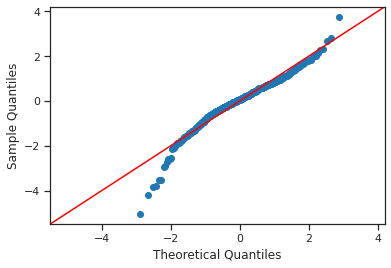

In [45]:
res = lm_final.resid # residuals
fig = sm.qqplot(res, line='45', fit=True)
plt.show()

#### RFE - Recurssive Feature Elimination

In [46]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Year_2019', True, 1),
 ('Holiday_Yes', True, 1),
 ('Workingday_Yes', True, 1)]

In [48]:
rfe_cols = list(train_df.columns[rfe.support_])
rfe_cols

['temp',
 'hum',
 'windspeed',
 'Spring',
 'Summer',
 'Winter',
 'Light_Snow',
 'Mist_Cloudy',
 'Jan',
 'Jul',
 'Sept',
 'Sat',
 'Year_2019',
 'Holiday_Yes',
 'Workingday_Yes']

In [49]:
list(train_df.columns[~rfe.support_])

['atemp',
 'Aug',
 'Dec',
 'Feb',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Mon',
 'Sun',
 'Thu',
 'Tue',
 'Wed']

#### Model Building Iteratively using selected features

In [50]:
lm_final = build_model(rfe_cols)
get_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.50e-191
Time:                        22:44:28   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2514      0.036      6.

#### Manual Feature Elimination based on P Test and VIF Score

In [51]:
rfe_cols.remove('Jan')
lm_final = build_model(rfe_cols)
get_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.31e-192
Time:                        22:44:28   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2397      0.036      6.

In [52]:
rfe_cols.remove('Holiday_Yes')
lm_final = build_model(rfe_cols)
get_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.37e-192
Time:                        22:44:28   Log-Likelihood:                 515.57
No. Observations:                 511   AIC:                            -1003.
Df Residuals:                     497   BIC:                            -943.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2302      0.036      6.

In [53]:
rfe_cols.remove('hum')
lm_final = build_model(rfe_cols)
get_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.69e-189
Time:                        22:44:29   Log-Likelihood:                 506.36
No. Observations:                 511   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -931.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1482      0.031      4.

In [54]:
rfe_cols.remove('Jul')
lm_final = build_model(rfe_cols)
get_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.44e-189
Time:                        22:44:29   Log-Likelihood:                 502.80
No. Observations:                 511   AIC:                            -981.6
Df Residuals:                     499   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1395      0.031      4.

In [55]:
rfe_cols.remove('Spring')
lm_final = build_model(rfe_cols)
get_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.13e-188
Time:                        22:44:29   Log-Likelihood:                 499.17
No. Observations:                 511   AIC:                            -976.3
Df Residuals:                     500   BIC:                            -929.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0744      0.019      3.

#### Observation
Both P-Test and VIF scores are acceptable, hence this model can be evaluated further and used for prediction

#### Model Evaluation

eval_env: 1


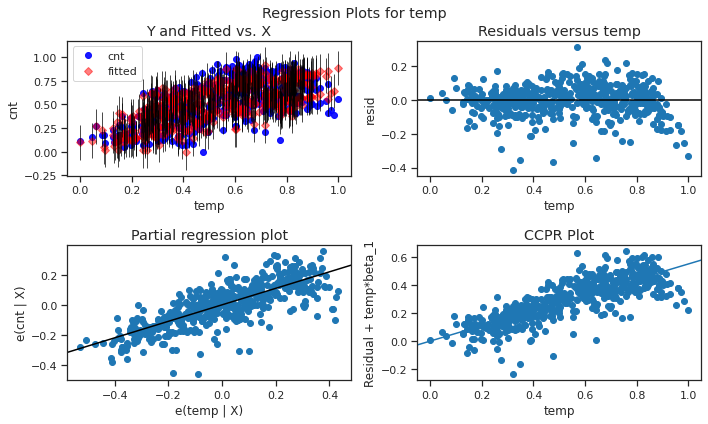

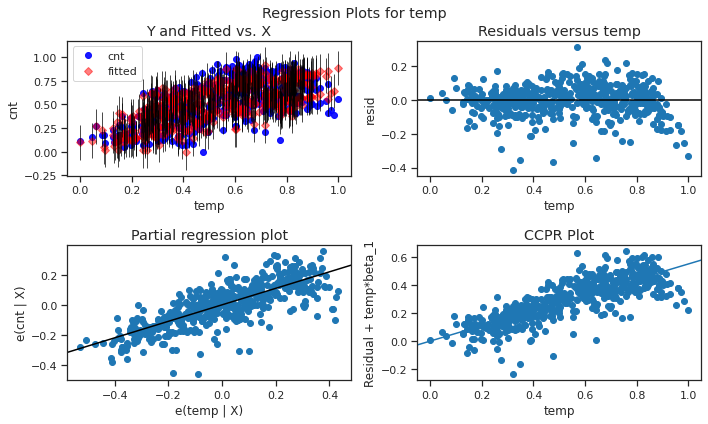

In [56]:
fig = plt.figure(figsize=(10, 6))

sm.graphics.plot_regress_exog(lm_final, 'temp', fig=fig)

##### $R^2$ Score for Train Data Set

In [57]:
lm_final.rsquared

0.8353552167101637

##### $R^2$ Adjusted Score for Train DataSet

In [58]:
lm_final.rsquared_adj

0.832062321044367

#### Residual Analysis of the train data

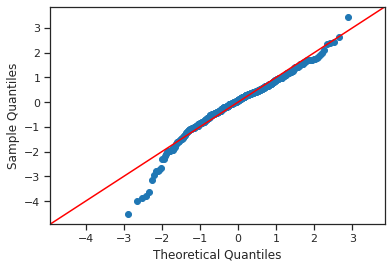

In [59]:
res = lm_final.resid # residuals
fig = sm.qqplot(res, fit=True, line='45')
plt.show()

In [60]:
x_lm = sm.add_constant(X_train[rfe_cols])

In [61]:
y_train_pred = lm_final.predict(x_lm)

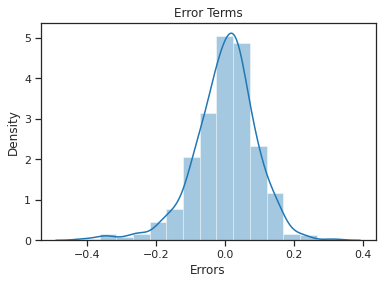

In [62]:
#Checking Assumptions of Normality:

sns.distplot(y_train-y_train_pred, bins=15)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

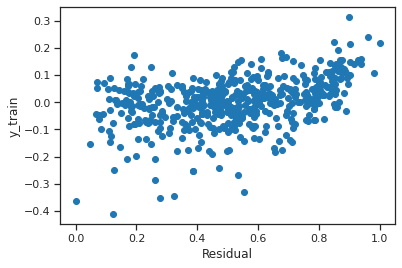

In [63]:
residual = (y_train-y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

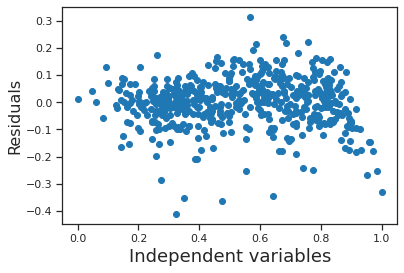

In [64]:
#Checking assumption of homoscedasticity and autocorrelation

plt.figure()
plt.scatter(X_train.iloc[:, 0].values,residual)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### Predictions Using the Final Model


In [65]:
test_df[num_vars] = scaler.transform(test_df[num_vars])
y_test = test_df.pop('cnt')
X_test = test_df

In [66]:
test_df.describe()

temp  atemp    hum  windspeed  Spring  Summer  Winter  Light_Snow  \
count 219.00 219.00 219.00     219.00  219.00  219.00  219.00      219.00   
mean    0.56   0.53   0.64       0.31    0.26    0.26    0.23        0.03   
std     0.23   0.22   0.15       0.16    0.44    0.44    0.42        0.16   
min     0.05   0.03   0.26      -0.04    0.00    0.00    0.00        0.00   
25%     0.35   0.34   0.53       0.20    0.00    0.00    0.00        0.00   
50%     0.56   0.55   0.63       0.30    0.00    0.00    0.00        0.00   
75%     0.76   0.71   0.74       0.40    1.00    1.00    0.00        0.00   
max     0.98   0.98   1.00       0.81    1.00    1.00    1.00        1.00   

       Mist_Cloudy    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May  \
count       219.00 219.00 219.00 219.00 219.00 219.00 219.00 219.00 219.00   
mean          0.32   0.06   0.09   0.10   0.08   0.11   0.10   0.05   0.09   
std           0.47   0.24   0.28   0.30   0.27   0.31   0.30   0.23   0.28   
min           0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
25%           0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
50%           0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
75%           1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
max           1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

         Nov    Oct   Sept    Mon    Sat    Sun    Thu    Tue    Wed  \
count 219.00 219.00 219.00 219.00 219.00 219.00 219.00 219.00 219.00   
mean    0.07   0.08   0.09   0.13   0.12   0.15   0.16   0.16   0.10   
std     0.26   0.28   0.28   0.33   0.32   0.35   0.37   0.37   0.30   
min     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
25%     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
50%     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
75%     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
max     1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

       Year_2019  Holiday_Yes  Workingday_Yes  
count     219.00       219.00          219.00  
mean        0.48         0.04            0.70  
std         0.50         0.19            0.46  
min         0.00         0.00            0.00  
25%         0.00         0.00            0.00  
50%         0.00         0.00            1.00  
75%         1.00         0.00            1.00  
max         1.00         1.00            1.00

In [67]:
rfe_cols

['temp',
 'windspeed',
 'Summer',
 'Winter',
 'Light_Snow',
 'Mist_Cloudy',
 'Sept',
 'Sat',
 'Year_2019',
 'Workingday_Yes']

In [68]:
X_test_lm = sm.add_constant(X_test[rfe_cols])
y_test_pred = lm_final.predict(X_test_lm)

### Linear Model Evaluation


##### $R^2$ Score

In [69]:
R2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
print(round(R2_test,4))

0.7956


#### Mean Squared Error (MSE)


In [70]:
#Returns the mean squared error
print(rmse(y_test,y_test_pred))

0.09853845546323875


#### Adjusted $R^2$
$ R^2adjusted = 1 - \frac{(1 - R^2) \times (N - 1)}{(N-p-1)} $

In [71]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1 - (1 - R2_test) * ((n - 1)/(n-p-1))
print(round(adjusted_r2_test,4))


0.7642


In [72]:
# list of coefs
lm_final.params

const             0.07
temp              0.55
windspeed        -0.16
Summer            0.09
Winter            0.13
Light_Snow       -0.29
Mist_Cloudy      -0.08
Sept              0.10
Sat               0.07
Year_2019         0.23
Workingday_Yes    0.06
dtype: float64

Text(0, 0.5, 'Predictions')

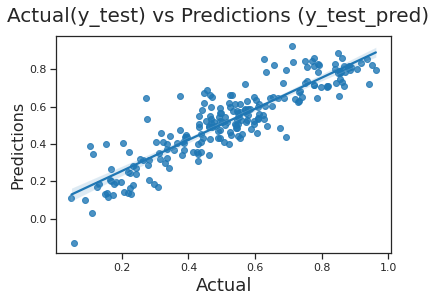

In [73]:
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Actual(y_test) vs Predictions (y_test_pred)', fontsize = 20)             
plt.xlabel('Actual', fontsize = 18)                          
plt.ylabel('Predictions', fontsize = 16)


#### Observations and Conclusions
 
- Equation for best fitted line:

$ cnt = 0.55 \times temp - 0.16 \times windspeed + 0.09 \times Summer + 0.13 \times Winter - 0.28  \times $ Light_Snow $ - 0.08 \times $ Mist_Cloudy $ + 0.10 \times Sept + 0.02 \times Sat + 0.23 \times$ Year_2019 $ + 0.06 \times $ Workingday_Yes 

- $R^2$ Score of train data 0.8354 or 83.5% and test data is 0.7956 or 79.5%

- The difference between $R^2$ of train data and $R^2$ of test data is ~4%

- Features affecting demand are below :
    
    - Temperature
    - Season
    - Weather Situation - Clear Weather (propotional), Mist Cloudy and Light & Snow (inversely)
    - Humidity (inversely)
    - Windspeed (inversely)
    - Year (2019)
    

- More bikes are in demand during working days
